# FDIC default prediction with Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_hdf('./data/df_train_FDIC_defaults_1Y.h5')
df_test  = pd.read_hdf('./data/df_test_FDIC_defaults_1Y.h5')

In [4]:
df_train.head()

,,Financial Institution Name,Institution Name,total_assets,defaulter,Failure / Assistance,log_TA,NI_to_TA,Equity_to_TA,NPL_to_TL,REO_to_TA,...,loss_provision_to_TL_plus_1Q,ROA_plus_1Q,NIM_plus_1Q,assets_growth_plus_1Q,default_within_1Y,Failure,max_total_assets,num_records,non_defaulter,const
IDRSSD,date,,,,,,,,,,,,,,,,,,,,,
904957,2008-03-31,COLORADO NATIONAL BANK,COLORADO NATIONAL BANK,142138.0,1.0,FAILURE,-0.048734,-6.505183,-0.759562,0.880756,-0.162301,...,0.004823,-0.367905,-0.840312,-0.582232,1.0,1.0,142138.0,31.0,0.0,1
202907,2011-06-30,"COMMUNITY BANK, NATIONAL ASSOCIATION",NaN,6364903.0,0.0,NaN,2.754852,0.143005,0.249275,-0.405931,-0.327268,...,-0.003057,0.205816,-0.140365,0.003962,0.0,NaN,8494486.0,60.0,1.0,1
652874,2012-12-31,"NEXBANK, SSB",NaN,784781.0,0.0,NaN,1.211269,0.229021,-0.301031,-0.750449,-0.304600,...,-0.003506,0.470935,-0.799310,0.284815,0.0,NaN,2698563.0,60.0,1.0,1
9115,2003-03-31,COMMERCE BANK/SHORE NATIONAL ASSOCIATION,NaN,2173481.0,0.0,NaN,1.962490,0.253469,-0.922810,-0.752942,-0.374868,...,-0.002819,0.225454,-0.324276,1.091618,0.0,NaN,2697759.0,12.0,1.0,1
3344611,2012-06-30,"BANK OF AMERICA RHODE ISLAND, NATIONAL ASSOCIA...",NaN,19405460.0,1.0,NaN,3.576923,0.103615,0.088508,2.380231,-0.121243,...,0.001903,0.101099,-0.791229,-0.408817,0.0,NaN,39211041.0,31.0,0.0,1


In [6]:
len(df_train)

641

In [10]:
df_train.columns

Index(['Financial Institution Name', 'Institution Name ', 'total_assets',
       'defaulter', 'Failure / Assistance ', 'log_TA', 'NI_to_TA',
       'Equity_to_TA', 'NPL_to_TL', 'REO_to_TA', 'ALLL_to_TL',
       'core_deposits_to_TA', 'brokered_deposits_to_TA', 'liquid_assets_to_TA',
       'loss_provision_to_TL', 'ROA', 'NIM', 'assets_growth', 'term_spread',
       'stock_mkt_growth', 'real_gdp_growth', 'unemployment_rate_change',
       'treasury_yield_3m', 'bbb_spread', 'bbb_spread_change',
       'log_TA_plus_1Q', 'NI_to_TA_plus_1Q', 'Equity_to_TA_plus_1Q',
       'NPL_to_TL_plus_1Q', 'REO_to_TA_plus_1Q', 'ALLL_to_TL_plus_1Q',
       'core_deposits_to_TA_plus_1Q', 'brokered_deposits_to_TA_plus_1Q',
       'liquid_assets_to_TA_plus_1Q', 'loss_provision_to_TL_plus_1Q',
       'ROA_plus_1Q', 'NIM_plus_1Q', 'assets_growth_plus_1Q',
       'default_within_1Y', 'Failure', 'max_total_assets', 'num_records',
       'non_defaulter', 'const'],
      dtype='object')

In [14]:
nondefaults = df_train[df_train['defaulter'] == 0.0]
defaults    = df_train[df_train['defaulter'] == 1.0]

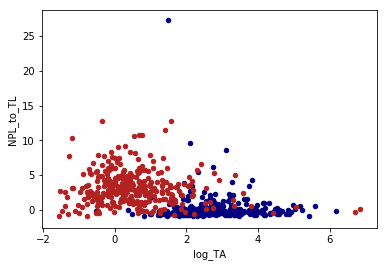

In [21]:
fig,ax = plt.subplots()
nondefaults.plot.scatter('log_TA', 'NPL_to_TL', c='navy',ax=ax)
defaults.plot.scatter('log_TA', 'NPL_to_TL', c='firebrick',ax=ax)

(-25, 15)

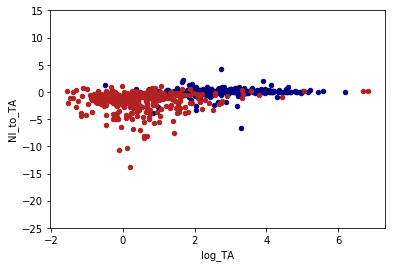

In [23]:
fig,ax = plt.subplots()
nondefaults.plot.scatter('log_TA', 'NI_to_TA', c='navy',ax=ax)
defaults.plot.scatter('log_TA', 'NI_to_TA', c='firebrick',ax=ax)
ax.set_ylim(-25, 15)